In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import pandas
from matplotlib  import cm

from matplotlib import rc

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

In [2]:
df = pandas.read_csv('Scan_03_03_2023_log.csv')  #nome del file da leggere

In [3]:
ndel = 2  #quante righe finali del .csv NON deve leggere. Sono quelle con i "-"
altezza = np.array(df['Depth [dBm]'])[:-ndel].astype(float)
peak_pos = np.array(df['resonance center [MHz]'])[:-ndel].astype(float)
Q = np.array(df['Q'])[:-ndel].astype(float)
er_Q = np.array(df['% error Q'])[:-ndel].astype(float)

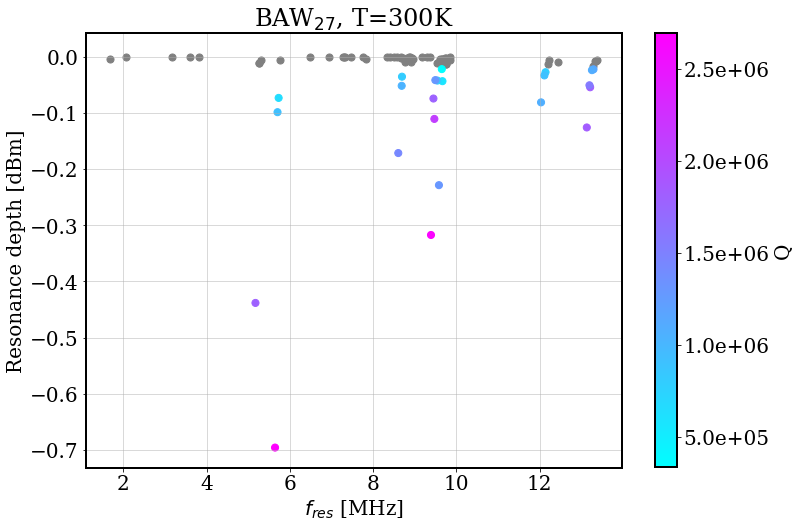

In [10]:
depth_thr = 0.02 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(altezza>depth_thr)[0]
ii2 = np.where(altezza<=depth_thr)[0]

fig = plt.figure()
ax = fig.add_subplot(111)
d =ax.scatter(peak_pos[ii2],-altezza[ii2],s=50,marker='o',color='grey')
d =ax.scatter(peak_pos[ii],-altezza[ii],s=50,c=Q[ii], marker = 'o', cmap = cm.cool )

plt.title(r'BAW$_{27}$, T=300K')
plt.colorbar(d,label='Q',format='%.1e')
plt.xlabel(r'$f_{res}$ [MHz]')
plt.ylabel('Resonance depth [dBm]')
plt.grid(alpha=0.6)
#plt.savefig('Scan_03.png')
plt.show()